<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Семинар: линейные модели</center></h2>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Линейная регрессия

## Пример: Стоимость автомобиля

Загрузите тренировочные данные и тестовые данные - уже знакомые нам данные по автомобилям.

In [3]:
df_train = pd.read_csv('./data/accord_sedan_training.csv')
df_test = pd.read_csv('./data/accord_sedan_testing.csv')

In [4]:
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


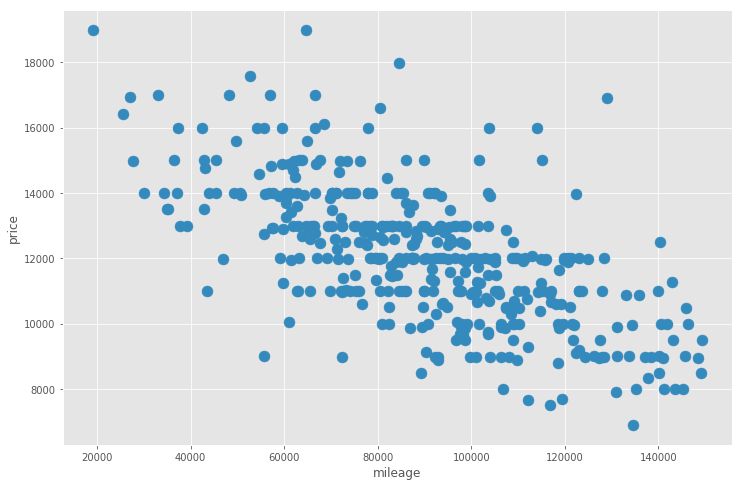

In [5]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

Кажется, что между стоимостью и пробегом зависимость линейная - давайте ее найдем!

In [12]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

In [7]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print('Модель:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0]))

Модель:
price = 16762.02 + (-0.05)*mileage


Нарисуйте предсказание модели (прямую) вместе с данными на плоскости. Здесь можно либо явно взять уравнение прямой и посчитать значения в каждой точке, либо через predict.

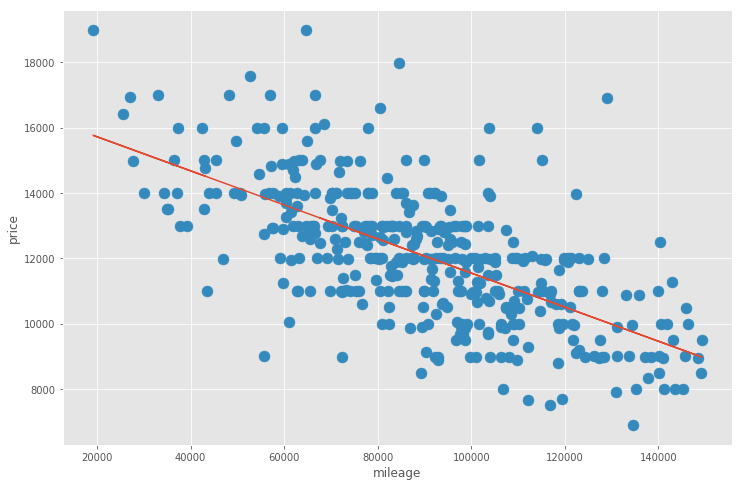

In [16]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)
y_hat = model.predict(X_train)

plt.plot(X_train, y_hat)

## Меры качества


**1. (R)MSE ((Root) Mean Squared Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N (y_n - \hat{y}_n)^2$$

**2. MAE (Mean Absolute Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N |y_n - \hat{y}_n|$$

* Чем плохи такие метрики?
* Отличия - http://yahwes.github.io/2016/03/22/mae-rmse/

**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_n^N (y_n - \hat{y}_n)^2}{\sum\limits_n^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_n^N |y_n - \hat{y}_n|}{\sum\limits_n^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_n^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$




**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_n^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

(0, 10)

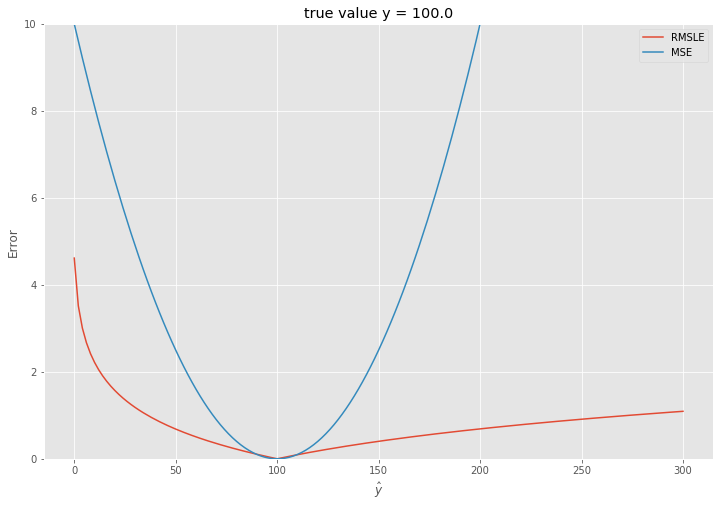

In [19]:
y = 100
y_hat = np.linspace(0, 300, 151)
# log error
error1 = np.sqrt((np.log(y+1) - np.log(y_hat + 1))**2)

# squared error
error2 = (y - y_hat)**2 /1000.

plt.plot(y_hat, error1, label='RMSLE')
plt.plot(y_hat, error2, label='MSE')
plt.xlabel('$\hat{y}$')
plt.ylabel('Error')
plt.title('true value y = %.1f' % y)
plt.legend()
plt.ylim(0, 10)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
y_hat = model.predict(X_train)

In [22]:
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

Средняя абсолютная ошибка 1182.21
Средняя квадратичная ошибка 2412292.55


Можно рассмотреть более сложную меру: коэффициент детерминации $R^2$:

* $TSS = \sum_i (y^{(i)}-\bar{y})^2$ - общая сумма квадратов (total sum of squares)
* $RSS = \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - сумма квадратов остатков (residual sum of squares)
* $ESS = \sum_i (\hat{y}^{(i)}-\bar{y})^2$ - объясненная сумма квадратов (explained sum of squares)

Для простоты будем считать, что
$$TSS = ESS + RSS$$

Тогда Коэффициент детерминации $R^2=1-\frac{RSS}{TSS}$

Рассчитайте его для нашей модели


In [23]:
r2_score(y_train, y_hat)

0.43096955626446276

## Оценка значимости коэффициентов с помощью бутстрепа

#### Интро в бутстреп

Иногда для анализа данных полезно знать не только среднее значение какого-нибудь признака, но и его [доверительный интервал](http://www.machinelearning.ru/wiki/index.php?title=%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB). 

Из курса статистики известно, что если выборка $x$ подчиняются нормальному закону распределения и нам известно стандартное отклонение $\sigma$ на *генеральной совокупности*, то доверительный интервал c доверительной вероятностью $(1-\alpha)$ для среднего можно вычислить по следующей формуле:

$$\left( \bar{x} - z_{1 - \alpha/2}\frac{\sigma}{\sqrt{n}}, \bar{x} + z_{1 - \alpha/2}\frac{\sigma}{\sqrt{n}} \right),$$

где $\bar{x}$ - выборочное среднее , $n$ - это размер выборки, а $z_{\gamma}$ - это квантиль нормального распределения уровня $\gamma$.

Выберем какой-то признак и посчитаем доверительный интервал

In [24]:
x = df_train.price.values

(array([ 2.,  8.,  4., 29., 19., 32., 54., 20., 64., 39., 52., 45.,  6.,
        19.,  2., 11.,  7.,  1.,  1.,  2.]),
 array([ 6900.  ,  7504.75,  8109.5 ,  8714.25,  9319.  ,  9923.75,
        10528.5 , 11133.25, 11738.  , 12342.75, 12947.5 , 13552.25,
        14157.  , 14761.75, 15366.5 , 15971.25, 16576.  , 17180.75,
        17785.5 , 18390.25, 18995.  ]),
 <a list of 20 Patch objects>)

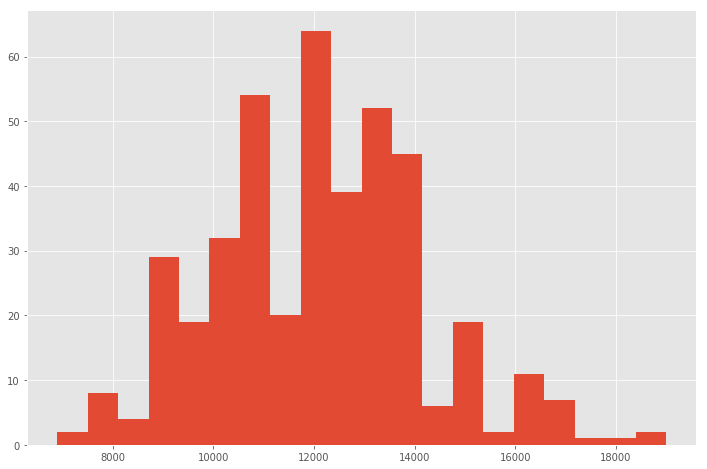

In [25]:
plt.hist(x, bins=20)

In [26]:
# Посчитаем 95% доверительный интервал (alpha = 0.05)
# Тогда просто согласно формуле

sigma = x.std() # Вообще говоря, это неправда, но будем считать, что это знание свыше
n = x.shape[0]
z = 1.96 # 0.975 квантиль
xm = x.mean()

lb, rb = xm - z*sigma/np.sqrt(n), xm + z*sigma/np.sqrt(n)

print('95%% доверительный интервал: (%.3f, %.3f)' % (lb, rb))
print('Среднее %.3f' % xm)

95% доверительный интервал: (11886.620, 12281.864)
Среднее 12084.242


In [27]:
x.shape

(417,)

Есть другой, более универсальный способ для расчета доверительных интервалов любых статистик - метод [bootstap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), идея которого заключается в многократной генерации выборок на базе имеющейся выборки.

Для того, чтобы найти доверительный интервал методом bootstrap проделайте следующие шаги:
1. Создайте случайную матрицу размера $417 \times 1000$. $417$ - есть измерения по $417$ объектам, а $1000$ - это количество bootstrap-выборок, которое мы отсэмплируем. Значения в этой матрице должны быть целочисленными от 0 до 416 (включительно). Полученная матрица - матрица со случайными индексами элементов массива, для которого мы считаем доверительный интервал
2. Выполните сэмплирование - должна получится новая матрица размера $417 \times 1000$, но заполненная значениями из массива.
3. Посчитайте среднее по каждому столбцу - получится массив выборочных средних.
4. По массиву из пункта выше посчитайте 2.5% и 97.5% персентили - это и будут границы доверительного интервала.

In [61]:
rnd_idx = np.random.randint(0, 416, size=(417, 1000))
bootstap_sample = x[rnd_idx]

In [67]:
bootstrap_means = bootstap_sample.mean(axis=0)

In [69]:
np.percentile(bootstrap_means, [2.5, 97.5])

array([11872.18782974, 12281.29070743])

In [71]:
bootstrap_means.mean()

12075.540944844122

Зачем это нам? Для моделей мы можем точно также делать оценки каких-то их параметров.

В частности, для линейной регрессии мы можем методом бутстрепа генерировать выборки для обучения, строить модели и запоминать полученные коэффициенты. 

Затем точно так же можно смотреть на доверительный интервал для коэффициентов

Используйте бутстреп для данного датасета

In [106]:
betas_mileage = np.empty((1000,))
betas_intercept = np.empty((1000,))

for i in range(1000):
    rnd_idx = np.random.randint(0, X_train.shape[0]-1, size=(X_train.shape[0],))

    y_bootstap = y_train[rnd_idx]
    X_bootstap = X_train[rnd_idx, :]

    model.fit(X_bootstap, y_bootstap)

    betas_mileage[i] = model.coef_[0]
    betas_intercept[i] = model.intercept_

In [109]:
np.percentile(betas_mileage, [2.5, 97.5])

array([-0.05771692, -0.04583858])

In [110]:
np.percentile(betas_intercept, [2.5, 97.5])

array([16163.66493411, 17322.26897075])

In [104]:
import seaborn as sns

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


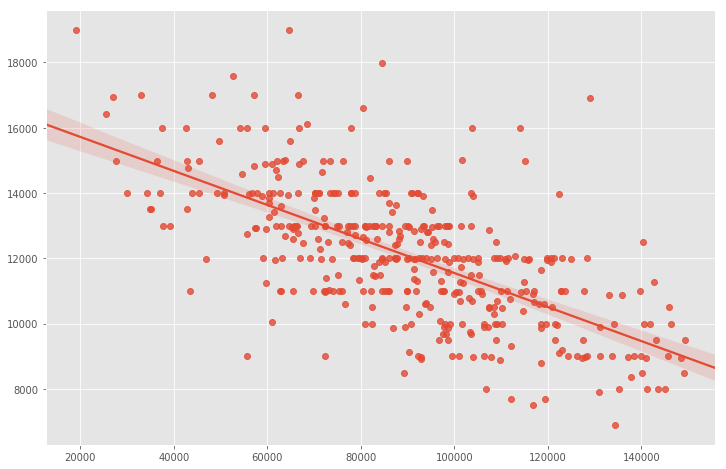

In [111]:
sns.regplot(X_train, y_train)

Но есть различные статистические оценки для доверительных интервалов. Их можно либо считать [самому](https://math.stackexchange.com/questions/871601/confidence-interval-for-regression-coefficient-beta), либо использовать пакеты, в которых все расчитывается автоматом

In [ ]:
# !pip install statsmodels

In [112]:
import statsmodels.api as sm

In [115]:
X_train2 = np.c_[X_train, np.ones_like(X_train)]

In [116]:
ols = sm.OLS(y_train, exog=X_train2)

In [117]:
model = ols.fit()

In [118]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.430     
Dependent Variable: y                AIC:                7315.6635 
Date:               2018-11-21 20:28 BIC:                7323.7297 
No. Observations:   417              Log-Likelihood:     -3655.8   
Df Model:           1                F-statistic:        314.3     
Df Residuals:       415              Prob (F-statistic): 9.22e-53  
R-squared:          0.431            Scale:              2.4239e+06
-------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
x1           -0.0521   0.0029 -17.7288 0.0000    -0.0579    -0.0464
const     16762.0249 274.6464  61.0313 0.0000 16222.1534 17301.8965
-------------------------------------------------------------------
Omnibus:              32.530        Durbin-Watson:           1.688 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        58.603
Skew:                 0.487         Prob(JB):                0.000 
Kurtosis:             4.557         Condition No.:           336445
===================================================================
* The condition number is large (3e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

## Эффект регуляризации

Теперь, давайте попробуем добавить столбец с "километрами" в наш датафрейм (линейная зависимость) и 

1. Посмотрим что будет с коэффициентами
2. Добавим регуляризации

In [119]:
from sklearn.linear_model import Ridge, Lasso

In [159]:
X_train2 = np.c_[X_train, X_train*0.62]

In [166]:
# model = LinearRegression()
model = Lasso(alpha=1.0)
model.fit(X_train2, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [167]:
model.coef_

array([-0.05213421, -0.        ])

In [168]:
model.intercept_

16762.02477739712

## Преобразование переменных

Давайте попробуем  добавить остальные переменные

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [176]:
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [177]:
df_train.trim.value_counts()

ex     288
lx     120
exl      9
Name: trim, dtype: int64

In [178]:
def data_preproc(df_input):
    df_output = df_input.copy()
    
    df_output.loc[:, 'transmission'] = df_output.transmission.replace({'Automatic': 0,
                                                                       'Manual': 1})
    df_output.loc[:, 'engine'] = df_output.engine.str[0].astype(int)
    df_output.loc[:, 'trim'] = df_output.trim.replace({'ex': 0,
                                                       'lx': 1,
                                                       'exl': 2})
    df_output = df_output.drop(['year'], axis=1)
    
    
    return df_output

In [179]:
df_train_preproc = df_train.pipe(data_preproc)

In [181]:
X_train = df_train_preproc.iloc[:, 1:].values
y_train = df_train_preproc.iloc[:, 0].values

In [182]:
X_train[:10]

array([[ 67697,      0,      4,      1],
       [ 73738,      0,      4,      1],
       [ 80313,      1,      4,      0],
       [ 86096,      1,      4,      0],
       [ 79607,      1,      4,      0],
       [ 96966,      1,      4,      0],
       [126150,      1,      4,      0],
       [119255,      1,      4,      0],
       [ 73513,      2,      4,      0],
       [ 50649,      0,      4,      0]])

In [207]:
model = Pipeline([
    ('ohe', OneHotEncoder(n_values='auto', categorical_features=[1], handle_unknown='ignore')),
    ('linreg', LinearRegression(fit_intercept=False))
])

# Избегаем мультиколлинеарности сами!

In [208]:
model.fit(X_train, y_train)

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:341: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. n_values='auto' can be replaced with categories='auto'.
  warnings.warn(msg, DeprecationWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Pipeline(memory=None,
     steps=[('ohe', OneHotEncoder(categorical_features=[1], categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values='auto', sparse=True)), ('linreg', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [209]:
ohe = model.named_steps['ohe']

In [210]:
ohe.categories_

[array([0., 1., 2.])]

In [211]:
model.named_steps['linreg'].coef_

array([ 1.55046625e+04,  1.44122069e+04,  1.59703332e+04, -5.22010985e-02,
        3.37203254e+02, -8.41350658e+02])

In [212]:
model.named_steps['linreg'].intercept_

0.0

А теперь для статс моделс

In [220]:
def data_preproc(df_input):
    df_output = df_input.copy()
    
    df_output.loc[:, 'transmission'] = df_output.transmission.replace({'Automatic': 0,
                                                                       'Manual': 1})
    df_output.loc[:, 'engine'] = df_output.engine.str[0].astype(int)
#     df_output.loc[:, 'trim'] = df_output.trim.replace({'ex': 0,
#                                                        'lx': 1,
#                                                        'exl': 2})
    df_output = pd.get_dummies(df_output, columns=['trim'], drop_first=True)
    df_output = df_output.drop(['year'], axis=1)
    df_output.loc[:, 'dummy'] = 1.0
    
    
    return df_output

In [221]:
df_train_preproc_stats_models = df_train.pipe(data_preproc)

In [222]:
df_train_preproc_stats_models.head()

,price,mileage,engine,transmission,trim_exl,trim_lx,dummy
0,14995,67697,4,1,0,0,1.0
1,11988,73738,4,1,0,0,1.0
2,11999,80313,4,0,0,1,1.0
3,12995,86096,4,0,0,1,1.0
4,11333,79607,4,0,0,1,1.0


In [223]:
y_train = df_train_preproc_stats_models.iloc[:, 0].values
X_train = df_train_preproc_stats_models.iloc[:, 1:].values

In [224]:
ols = sm.OLS(y_train, X_train)

In [225]:
model = ols.fit()

In [226]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           3.77e-70
Time:                        21:06:05   Log-Likelihood:                -3604.3
No. Observations:                 417   AIC:                             7221.
Df Residuals:                     411   BIC:                             7245.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0522      0.003    -19.962      0.000      -0.057      -0.047
x2           337.2025     73.074      4.615      0.000     193.557     480.848
x3          -841.3507    246.604     -3.412      0.001   -1326.113    -356.588
x4           465.6708    476.592      0.977      0.329    -471.191    1402.533
x5         -1092.4555    159.656     -6.843      0.000   -1406.300    -778.611
const        1.55e+04    450.080     34.449      0.000    1.46e+04    1.64e+04
==============================================================================
Omnibus:                       40.761   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.412
Skew:                           0.601   Prob(JB):                     1.89e-16
Kurtosis:                       4.650   Cond. No.                     6.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Логистическая регрессия

## Игрушечный пример

Сгенерируем выборку и опробуем логистическую регрессию

In [ ]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [ ]:
from sklearn.linear_model import LogisticRegression

Обучим логистическую регрессию на этих данных и нарисуем разделяющую гиперплоскость

In [ ]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

In [ ]:
print('w_0 = %f' % model.intercept_)
print('w_1, w_2 = ', model.coef_)

In [ ]:
# Нарисуем эту гиперплоскость
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

x_1 = np.linspace(-4, 4, 10)
x_2 = - (w_0 + w_1*x_1)/w_2

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)
plt.plot(x_1, x_2)

## Пример с текстами

Возьмем текстовые данные [отсюда](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/). Архив содержит 3 файла с положительными и отрицательными отзывами с ресурсов
* imdb.com
* amazon.com
* yelp.com

Формат файла следующий:
<отзыв>\t<метка>\n


### Задача
1. Загрузите тексты и метки классов в разные переменные
2. Выберите меру качества классификации
3. Обучите логистическую (без подбора гиперпараметров). Тексты представляются в виде мешка слов
4. Выведите наиболее значимые слова из текста
5. С помощью кросс-валидации найдите хорошие значения гиперпараметров для `CountVectorizer` и `LogisticRegression`

In [ ]:
df = pd.read_csv('data/sentiment/imdb_labelled.txt', sep='\t', header=None, names=['text', 'label'])

In [ ]:
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV GridSearchCV

In [ ]:
model = Pipeline([
    ('vect', CountVectorizer(min_df=4, max_df=0.95, stop_words='english', ngram_range=(1,1))),
    ('clf', LogisticRegression())
])

In [ ]:
# Your Code Here